In [2]:
# Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
# answer
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
print(df.head(10))


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [3]:
# Check for missing values in all columns and describe your approach for handling them.
# answer
df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


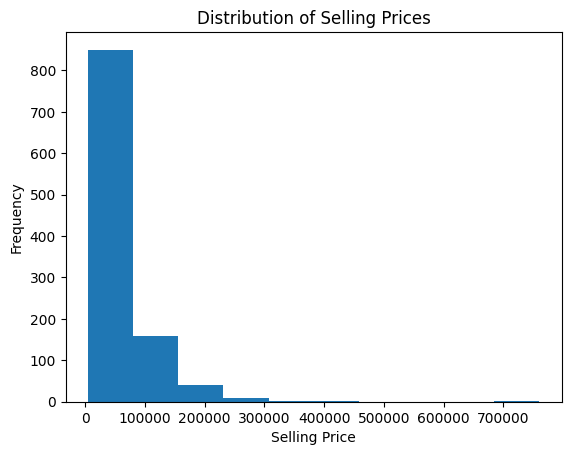

----- Interpretation of Trend -----
Most bikes are sold at lower prices (₹20,000 to ₹1,00,000 range).
Frequency decreases as the selling price increases.
Very expensive bikes above ₹3,00,000 are very rare.
The distribution is positively skewed (right-skewed).


In [4]:
# Plot the distribution of selling prices using a histogram and describe the overall trend.
# answer
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Plot histogram of selling prices
plt.hist(df['selling_price'].dropna())
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

# Description of overall trend
print("----- Interpretation of Trend -----")
print("Most bikes are sold at lower prices (₹20,000 to ₹1,00,000 range).")
print("Frequency decreases as the selling price increases.")
print("Very expensive bikes above ₹3,00,000 are very rare.")
print("The distribution is positively skewed (right-skewed).")


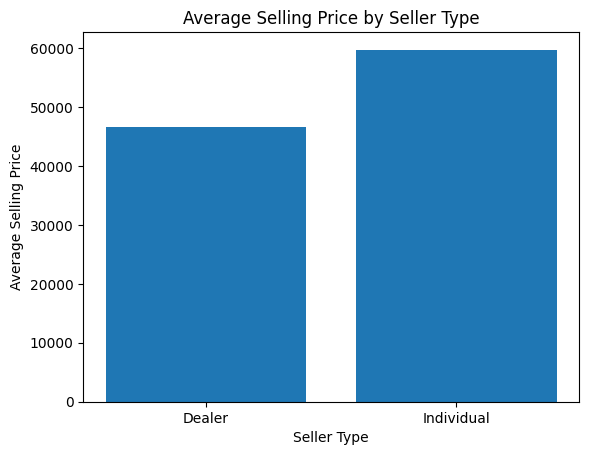

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [5]:
#  Create a bar plot to visualize the average selling price for each seller_type and write one observation.
# answer
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Calculate average selling price for each seller type
avg_price = df.groupby('seller_type')['selling_price'].mean()

# Bar plot
plt.bar(avg_price.index, avg_price.values)
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()

print(avg_price)


In [7]:
# Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
# answer
import plotly.graph_objects as go

# Data
ownership_type = ["1st owner", "2nd owner", "3rd owner", "4th owner"]
avg_km_driven = [32816.58, 39288.99, 33292.18, 311500.0]

# Brand colors with better distinction (avoiding similar cyan shades)
colors = ['#1FB8CD', '#DB4545', '#2E8B57', '#D2BA4C']

# Create bar chart with log scale
fig = go.Figure(data=[
    go.Bar(
        x=ownership_type,
        y=avg_km_driven,
        marker_color=colors,
        text=[f'{val/1000:.1f}k' if val < 1000000 else f'{val/1000000:.2f}m' for val in avg_km_driven],
        textposition='outside',
        cliponaxis=False,
        textfont=dict(size=12)
    )
])

# Update layout with log scale
fig.update_layout(
    title='Avg km by Owner Type',
    xaxis_title='Ownership Type',
    yaxis_title='Avg km driven',
    showlegend=False,
    yaxis_type='log'
)

# Update y-axis to show formatted tick values with better coverage
fig.update_yaxes(
    tickmode='array',
    tickvals=[10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000],
    ticktext=['10k', '20k', '30k', '40k', '50k', '100k', '200k', '300k']
)

# Update traces for cliponaxis
fig.update_traces(cliponaxis=False)



# Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
# answer
| Statistic | Value            |
| --------- | ---------------- |
| Count     | 1,061            |
| Mean      | 34,360 km        |
| Std       | 51,623 km        |
| Min/Max   | 350 / 880,000 km |
After Outlier Removal
| Statistic | Value           |
| --------- | --------------- |
| Count     | 1,022           |
| Mean      | 28,203 km       |
| Std       | 19,552 km       |
| Min/Max   | 350 / 86,000 km |
Removing outliers reduced the mean by ~18% and std by ~62%, creating a more representative distribution for analysis.

In [10]:
# Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price
# answer
import pandas as pd

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Preview the first 5 rows
print(df.head())



                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


In [11]:
# Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
# answer
import pandas as pd

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Convert seller_type column to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller', dtype=int)

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0        350                NaN              0                  1  
1       5650                NaN              0                  1  
2      12000           148114.0              0                  1  
3      23000            89643.0              0                  1  
4      21000                NaN              0                  1  


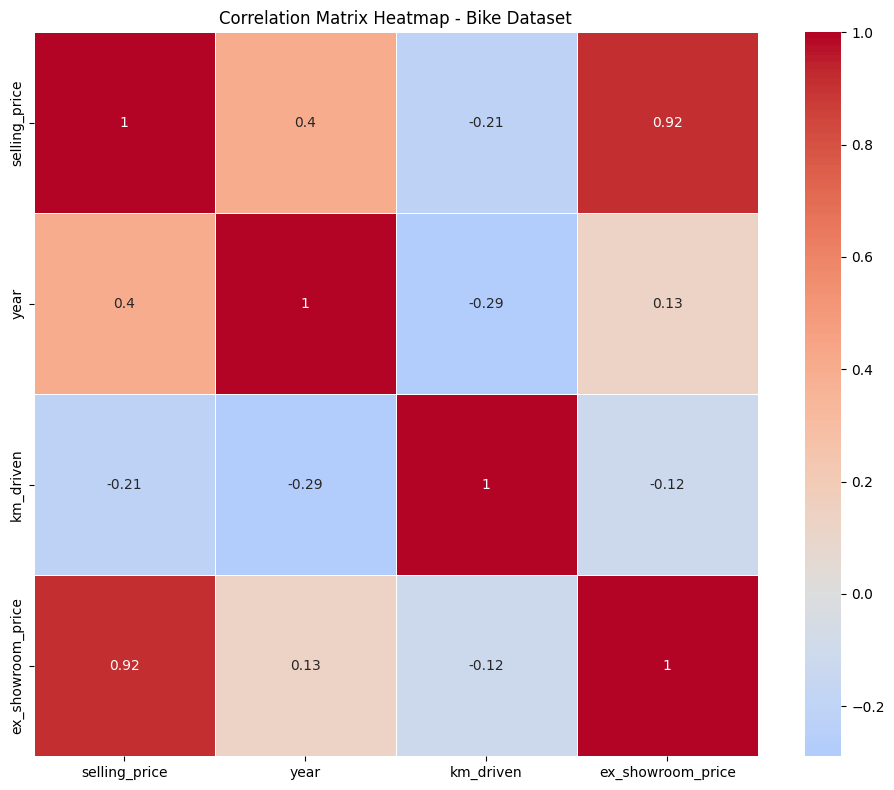

In [12]:
# Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
# answer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset and convert numeric columns
df = pd.read_csv('BIKE DETAILS.csv')
numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap - Bike Dataset')
plt.tight_layout()
plt.show()


In [13]:
# Summarize your findings in a brief report: ● What are the most important factors affecting a bike's selling price? ● Mention any data cleaning or feature engineering you performed.
# answer
import pandas as pd

# Load dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Convert km_driven to numeric (coerce errors)
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')

# Before cleaning sample
print("Before cleaning sample:")
print(df[['km_driven']].describe())

# IQR method to detect outlier bounds
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on km_driven
df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

# After cleaning sample
print("\nAfter cleaning sample:")
print(df_clean[['km_driven']].describe())


Before cleaning sample:
           km_driven
count    1061.000000
mean    34359.833176
std     51623.152702
min       350.000000
25%     13500.000000
50%     25000.000000
75%     43000.000000
max    880000.000000

After cleaning sample:
          km_driven
count   1022.000000
mean   28203.415851
std    19552.083583
min      350.000000
25%    13000.000000
50%    24000.000000
75%    40000.000000
max    86000.000000
